In [20]:
# Dependencies
import pandas as pd
import numpy as np
from config import api_key
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# Create a dataframe of all award-winning beers since 2009
csv_data = "beer_winners.csv"

all_winner_data = pd.read_csv(csv_data)
all_winner_data.columns = ['medal', 'beer_name','brewery',
                       'city','county','state',
                       'category','year','total_category_entries']
all_winner_data.head()

,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Gold,Milwaukee’s Best,Miller Brewing Co.,Golden,Jefferson,CO,American-Style Cream Ale or Lager,2009,24
1,Gold,County Seat Wheat,Blind Tiger Brewery & Restaurant,Topeka,Mason,KS,American-Style Wheat Beer,2009,19
2,Gold,Haywire Hefeweizen,Pyramid Breweries,Seattle,King,WA,American-Style Wheat Beer With Yeast,2009,43
3,Gold,Raspberry Creek,Breakwater Brewing Co.,Oceanside,San Diego,CA,Fruit Beer or Field Beer,2009,104
4,Gold,Stillwater Rye,Montana Brewing Co.,Billings,Christian,MT,Herb and Spice or Chocolate Beer,2009,85


## How many beers brewed in California have won a medal?

In [3]:
ca = all_winner_data[all_winner_data['state'] == 'CA']
ca.reset_index(inplace=True)
ca_number = ca['index'].count()
print(f'There have been {ca_number} award-winning* beers in California in the last decade.')
cal_data = ca.drop(columns=['index'],axis=1)
cal_data = cal_data.sort_values('year', ascending=False)
cal_data.reset_index(inplace=True)
cal_data = cal_data.drop(columns=['index'],axis=1)
cal_data.head()

There have been 553 award-winning* beers in California in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Bronze,Eclipse,FiftyFifty Brewing Co.,Truckee,Nevada,CA,Wood- and Barrel-Aged Strong Stout,2018,177
1,Silver,STS Pils,Russian River Brewing Co. - Production,Santa Rosa,Pima,CA,Kellerbier or Zwickelbier,2018,67
2,Gold,The Coachman,Societe Brewing Co.,San Diego,San Diego,CA,Session India Pale Ale,2018,92
3,Gold,Santa's Brass,Drake's Brewing Co.,San Leandro,Alameda,CA,Wood- and Barrel-Aged Strong Beer,2018,162
4,Silver,Märzen,Sudwerk Brewing Co.,Davis,Yolo,CA,American-Style Amber Lager,2018,91


## How many beers brewed in San Diego have won a medal?

In [4]:
temp = cal_data[cal_data['county'] == 'San Diego']
temp.reset_index(inplace=True)
sd_number = temp['index'].count()
print(f'There have been {sd_number} award-winning* beers in San Diego in the last decade.')
sd_data = temp.drop(columns=['index'], axis=1)
sd_data = sd_data.sort_values('year', ascending=False)
sd_data.reset_index(inplace=True)
sd_data = sd_data.drop(columns=['index'],axis=1)
sd_data.head()

There have been 148 award-winning* beers in San Diego in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Gold,The Coachman,Societe Brewing Co.,San Diego,San Diego,CA,Session India Pale Ale,2018,92
1,Silver,Oats,Pizza Port Solana Beach,Solana Beach,San Diego,CA,Oatmeal Stout,2018,59
2,Silver,Duck Duck Gooze,Port Brewing Co. / The Lost Abbey,San Marcos,San Diego,CA,Wood- and Barrel-Aged Sour Beer,2018,76
3,Silver,Redrum,Duck Foot Brewing Co.,San Diego,San Diego,CA,Wood- and Barrel-Aged Beer,2018,77
4,Silver,Noble Miner,Burgeon Beer Co.,Carlsbad,San Diego,CA,Session Beer,2018,50


## In terms of medals won, what are the top 5 breweries in San Diego?

In [5]:
medals_sd = sd_data.groupby(['brewery'])['medal'].count()
top_brew_sd = medals_sd.sort_values(ascending=False)
top_5_sd = top_brew_sd.head()
top_5_sd

brewery
Pizza Port Carlsbad        24
AleSmith Brewing Co.       10
The Lost Abbey              9
Pizza Port Solana Beach     8
Pizza Port Ocean Beach      7
Name: medal, dtype: int64

## In terms of medals won, what are the top 5 breweries in California?

In [6]:
medals_cal = cal_data.groupby(['brewery'])['medal'].count()
top_brew_cal = medals_cal.sort_values(ascending=False)
top_5_cal = top_brew_cal.head()
top_5_cal

brewery
Firestone Walker Brewing Co.    28
Pizza Port Carlsbad             24
Pabst Brewing Co.               12
Pizza Port Ocean Beach          12
Beachwood BBQ & Brewing         11
Name: medal, dtype: int64




## Why is there a discrepancy between the San Diego list and the California list?
### Let's find out!




In [7]:
pizza_port = all_winner_data[all_winner_data['brewery'] == 'Pizza Port Ocean Beach']
pizza_port = pizza_port.sort_values('year', ascending=False)
pizza_port.reset_index(inplace=True)
pizza_port = pizza_port.drop(columns=['index'],axis=1)
pizza_port

,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Gold,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2017,40
1,Bronze,Bacon and Eggs,Pizza Port Ocean Beach,San Diego,San Diego,CA,Coffee Beer,2015,149
2,Bronze,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2015,44
3,Silver,Guillaume,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2014,94
4,Bronze,La Flama Dorada,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Belgian-Style Tripel,2014,58
5,Gold,Beer Hunter,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2013,56
6,Silver,Rhino Chaser,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Imperial Red Ale,2013,56
7,Bronze,Kung Fu Elvis,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,American-Style Strong Pale Ale,2013,120
8,Gold,Skidmark Brown Ale,Pizza Port Ocean Beach,San Diego,San Diego,CA,English-Style Mild Ale,2011,25
9,Silver,Rhino Chaser Imperial Red Ale,Pizza Port Ocean Beach,San Diego,San Diego,CA,Imperial Red Ale,2011,57


## Now for the big question:
## What are the top 5 breweries in the United States?

In [8]:
medals_us = all_winner_data.groupby(['brewery'])['medal'].count()
top_brew_us = medals_us.sort_values(ascending=False)
top_5_us = top_brew_us.head()
top_5_us

brewery
Firestone Walker Brewing Co.    28
Pizza Port Carlsbad             24
Sun King Brewing Co.            19
Pabst Brewing Co.               19
Chuckanut Brewery               18
Name: medal, dtype: int64

In [9]:
# ^^^
# Maybe we might want to speak on the fact that
# Firestone is in SLO and Pizza Port Carlsbad is in SD County?

In [10]:
# Create a dataframe?
# Possible visualization ideas?
# Possible state-by-state breakdown of medals? Using a different groupby?
# Even see the mean of all US states medal counts and compare it to CA? <-- I like this idea the best so far, myself

sd_medals = sd_data.groupby(['medal'])['year'].count()
ca_medals = cal_data.groupby(['medal'])['year'].count()
all_medals = all_winner_data.groupby(['medal'])['year'].count()
print('all SD medals')
print(sd_medals)
print("")
print('all CA medals')
print(ca_medals)
print("")
print('all US medals')
print(all_medals)

# medals_df = pd.DataFrame('sd_metals','ca_medals','all_medals')
# medals_df

all SD medals
medal
Bronze    49
Gold      58
Silver    41
Name: year, dtype: int64

all CA medals
medal
Bronze    186
Gold      185
Silver    182
Name: year, dtype: int64

all US medals
medal
Bronze    886
Gold      878
Silver    882
Name: year, dtype: int64


In [11]:
means_us = all_winner_data.groupby(['category'])['total_category_entries'].mean()
means_us.head(10)

category
Aged Beer                                    33.2
American Style Amber Lager                   45.0
American Style Amber/Red Ale                 78.0
American Style Brown Ale                     43.0
American Style Light Lager                   25.0
American Style Pale Ale                     108.0
American Style Specialty Lager               23.0
American-Belgo-Style Ale                     60.7
American-Style Amber Lager                   58.0
American-Style Amber Lager or Dark Lager    108.0
Name: total_category_entries, dtype: float64

In [12]:
means_cal = cal_data.groupby(['category'])['total_category_entries'].mean()
means_cal.head(10)

category
Aged Beer                                    34.333333
American Style Amber/Red Ale                 78.000000
American Style Brown Ale                     43.000000
American-Belgo-Style Ale                     63.375000
American-Style Amber Lager                   69.500000
American-Style Amber Lager or Dark Lager    108.000000
American-Style Amber/Red Ale                 96.363636
American-Style Black Ale                     63.625000
American-Style Brett Beer                    38.000000
American-Style Brown Ale                     75.142857
Name: total_category_entries, dtype: float64

In [13]:
means_sd = sd_data.groupby(['category'])['total_category_entries'].mean()
means_sd.head(10)

category
American Style Amber/Red Ale       78.000000
American Style Brown Ale           43.000000
American-Belgo-Style Ale           70.333333
American-Style Amber/Red Ale       99.333333
American-Style Black Ale           73.000000
American-Style Brown Ale           69.666667
American-Style India Black Ale     53.000000
American-Style India Pale Ale     235.000000
American-Style Pale Ale           157.500000
American-Style Sour Ale            53.400000
Name: total_category_entries, dtype: float64

In [14]:
# Possibly a line graph? Or scatter-plot?

total_entries_us = all_winner_data.groupby(['year'])['total_category_entries'].count()
print('total US entries')
print(total_entries_us)
total_entries_cal = cal_data.groupby(['year'])['total_category_entries'].count()
print("")
print('total CA entries')
print(total_entries_cal)
total_entries_sd = sd_data.groupby(['year'])['total_category_entries'].count()
print("")
print('total SD entries')
print(total_entries_sd)

total US entries
year
2009    234
2010    236
2011    248
2012    251
2013    249
2014    268
2015    275
2016    286
2017    293
2018    306
Name: total_category_entries, dtype: int64

total CA entries
year
2009    39
2010    52
2011    51
2012    49
2013    52
2014    46
2015    67
2016    68
2017    57
2018    72
Name: total_category_entries, dtype: int64

total SD entries
year
2009    14
2010    15
2011    18
2012    14
2013     8
2014    12
2015    19
2016    18
2017    14
2018    16
Name: total_category_entries, dtype: int64


In [15]:
# List of all award-winning beers in 2018
# Any ides for visualization and/or story-telling?

bweh = sd_data.loc[sd_data['year'] == 2018]
sd_2018 = bweh[['medal', 'beer_name', 'brewery', 'category', 'total_category_entries']]
sd_2018

,medal,beer_name,brewery,category,total_category_entries
0,Gold,The Coachman,Societe Brewing Co.,Session India Pale Ale,92
1,Silver,Oats,Pizza Port Solana Beach,Oatmeal Stout,59
2,Silver,Duck Duck Gooze,Port Brewing Co. / The Lost Abbey,Wood- and Barrel-Aged Sour Beer,76
3,Silver,Redrum,Duck Foot Brewing Co.,Wood- and Barrel-Aged Beer,77
4,Silver,Noble Miner,Burgeon Beer Co.,Session Beer,50
5,Bronze,Bird Park,North Park Beer Co.,Bohemian-Style Pilsener,84
6,Bronze,Know Ego,Groundswell Brewing Co.,Classic Irish-Style Dry Stout,54
7,Bronze,Rail Gun Wee Heavy,BNS Brewing & Distilling Co.,Old Ale or Strong Ale,37
8,Silver,Delaminator Doppelbock,Rip Current Brewery,German-Style Doppelbock or Eisbock,31
9,Bronze,Zungen Brecher,Home Brewing Co.,Historical Beer,38


In [16]:
# POSSIBLE DATA VISUALIZATION FOR THIS LIST?
# ***How many award-winning beers does each brewery have?***

# Maybe a pie chart showing the medal breakdown of SD breweries?
# Or a pie chart showing the top 5-7 breweries, with all the others listed as "Other"

# Maybe combine similar names (i.e. "Ballast Point Brewing Co" and "Ballast Point Brewing Co.")
top_brew_sd

brewery
Pizza Port Carlsbad                                       24
AleSmith Brewing Co.                                      10
The Lost Abbey                                             9
Pizza Port Solana Beach                                    8
Pizza Port Ocean Beach                                     7
Green Flash Brewing Co.                                    6
Port Brewing Co.                                           6
BNS Brewing & Distilling Co.                               4
Rip Current Brewery                                        4
Karl Strauss Brewing Co. - La Jolla                        4
Karl Strauss Brewing Co.                                   4
Societe Brewing Co.                                        4
Ballast Point Brewing & Spirits - Scripps Ranch            3
Stone Brewing World Bistro & Gardens - Liberty Station     3
Bagby Beer Co.                                             3
Breakwater Brewing Co.                                     3
Second Chance Be

In [17]:
csv_file = "total_cat_entries_by_year.csv"
entries_tot = pd. read_csv(csv_file)
entries_tot.head(10)

,Year,Category,Entries
0,2009,Aged Beer,32
1,2009,American Style Amber Lager,45
2,2009,American Style Amber/Red Ale,78
3,2009,American Style Brown Ale,43
4,2009,American Style Light Lager,25
5,2009,American Style Pale Ale,108
6,2009,American Style Specialty Lager,23
7,2009,American-Belgo-Style Ale,51
8,2009,American-Style Cream Ale or Lager,24
9,2009,American-Style Dark Lager,15


### Plot - Total Entries Over Past 10 Years

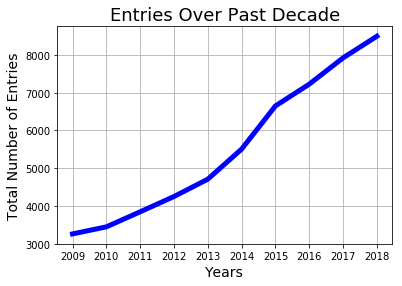

In [67]:
year_grp = entries_tot.groupby(["Year"])
# year_grp.describe()
entries_sum = year_grp["Entries"].sum()
year = entries_tot["Year"].unique()

x_axis = year
y_axis = entries_sum
tick_locs = []
for x in x_axis:
    tick_locs.append(x)

# Testing plots
# plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")

plt.plot(x_axis, y_axis, color="blue", linewidth=5)

plt.xticks(tick_locs, year)
plt.title("Entries Over Past Decade", size=18)
plt.xlabel("Years", size=14)
plt.ylabel("Total Number of Entries", size=14)
plt.grid(True)
plt.show()

### Testing Plot for # Categories Over the Years

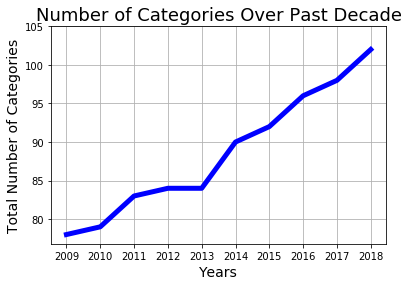

In [75]:
category_count = year_grp["Category"].count()
# category_count
y_axis = category_count

plt.plot(x_axis, y_axis, color="blue", linewidth=5)
# plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")

plt.xticks(tick_locs, year)
plt.title("Number of Categories Over Past Decade", size=18)
plt.xlabel("Years", size=14)
plt.ylabel("Total Number of Categories", size=14)
plt.ylim(top=105)
plt.grid(True)
plt.show()